# Electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}_\text{c}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}


## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3. Discretization
For the fields, B-spline Finite Elements are used together with a Crank-Nicolson time discretization which leads to the following matrix formulation:

\begin{align}
\left[M+\frac{1}{2}\Delta tCA_1+\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n+1}=\left[M-\frac{1}{2}\Delta tCA_1-\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n} + \Delta t \tilde{\textbf{F}}^{n+1/2},
\end{align}

with the mass and convection matrices

\begin{align}
M_{ij}=\int\varphi_i\varphi_j\,\text{d}z, \\
C_{ij}=\int\varphi_i\varphi_j^\prime\,\text{d}z
\end{align}

The hot current density is obtained using PIC techniques, i.e. the distribution function reads

\begin{align}
f_\text{h}(z,\textbf{v},t) \approx \frac{1}{N_k}\sum_k w_k\delta(z-z_k(t))\delta(\textbf{v}-\textbf{v}_k(t))
\end{align},

with the orbit equations

\begin{align}
\frac{\text{d}z_k}{dt}=v_{kz}, \\
\frac{\text{d}\textbf{v}_k}{dt}=\frac{q}{m}(\textbf{E}_k+\textbf{v}_k\times\textbf{B}_k).
\end{align}
With the definition of $f_\text{h}$ the inhomogeneity $\tilde{\textbf{F}}^{n+1/2}$ is

\begin{align}
\tilde{F}^{n+1/2}_i = -c^2\mu_0q\frac{1}{N_k}\sum_k w_k\textbf{v}_k^{n+1/2}\varphi_i(z_k^{n+1/2}).
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy
from scipy.linalg import block_diag

from Utils_Dipole.bsplines import Bspline
from Utils_Dipole.borisPush import borisPush
from Utils_Dipole.fieldInterpolation_V1 import fieldInterpolation
from Utils_Dipole.hotCurrent import hotCurrent
from Utils_Dipole.initialConditions import IC
from Utils_Dipole.dispersionSolver import solveDispersionHybrid
from Utils_Dipole.createBasis import createBasis
from Utils_Dipole.matrixAssembly import matrixAssembly
from Utils_Dipole.L2Projection import L2proj
from Utils_Dipole.evaluation import evaluation



restart = 0                        # ... start the simulation from the beginning (0) or continue (1)                                
title = 'Results/03_DipoleField/simulation_data_T=6000_L=327.7_xi=8.62e-5.txt' # ... directory for saving data


# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0 = 1.0                           # ... minimum of background magnetic field in z-direction at z = Lz/2
wce = qe*B0/me                     # ... electron cyclotron frequency
wpe = 5*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-3                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles

xi = 8.62e-5                       # ... inhomogeneity factor of background magnetic field
bcs = 2                            # ... boundary conditions (1: periodic, 2: absorbing with homogeneous Dirichlet)
# ...




# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 6                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 326.0                         # ... total length of z-domain
Nz = 4*256                         # ... number of elements z-direction
T = 4500.0                         # ... simulation time
dt = 0.05                          # ... time step
p = 3                              # ... degree of B-spline basis
Lv = 2                             # ... length of v-domain in each direction (vx,vy,vz)
Nv = 76                            # ... number of cells in each v-direction (vx,vy,vz)
Np = np.int(1e5)                   # ... number of energetic simulation particles 

Ld = 0.045*Lz                      # ... length of damping region at each end 
# ...



# ... create parameter list
if bcs == 1:
    pa = np.zeros(8*Nz + 1)
elif bcs == 2:
    pa = np.zeros(8*(Nz + p - 2) + 1)

pa[0]  = eps0
pa[1]  = mu0
pa[2]  = c
pa[3]  = qe 
pa[4]  = me 
pa[5]  = B0 
pa[6]  = wce 
pa[7]  = wpe 
pa[8]  = nuh 
pa[9]  = nh 
pa[10] = wpar 
pa[11] = wperp 
pa[12] = k 
pa[13] = ini 
pa[14] = amp 
pa[15] = eps 
pa[16] = Lz 
pa[17] = Nz 
pa[18] = T 
pa[19] = dt 
pa[20] = p 
pa[21] = Lv 
pa[22] = Nv 
pa[23] = Np 
pa[24] = xi
pa[25] = bcs
pa[26] = Ld
# ...



# ... discretization parameters
dz = Lz/Nz
zj = np.linspace(0,Lz,Nz+1)

Nt = np.int(T/dt)
tn = np.linspace(0,T,Nt+1)

dv = Lv/Nv
vj = np.linspace(-Lv/2,Lv/2,Nv+1)
# ...






# ... system matrices for fluid electrons and electromagnetic fields and definition of background magnetic field B_background B0
A10 = np.array([0,0,0,c**2,0,0])
A11 = np.array([0,0,-c**2,0,0,0])
A12 = np.array([0,-1,0,0,0,0])
A13 = np.array([1,0,0,0,0,0])
A14 = np.array([0,0,0,0,0,0])
A15 = np.array([0,0,0,0,0,0])
A1 = np.array([A10,A11,A12,A13,A14,A15])

A20 = np.array([0,0,0,0,mu0*c**2,0])
A21 = np.array([0,0,0,0,0,mu0*c**2])
A22 = np.array([0,0,0,0,0,0])
A23 = np.array([0,0,0,0,0,0])
A24 = np.array([-eps0*wpe**2,0,0,0,0,-wce])
A25 = np.array([0,-eps0*wpe**2,0,0,wce,0])
A2 = np.array([A20,A21,A22,A23,A24,A25])

s = int(np.sqrt(A1.size))

def B_background_z(z):
    return B0*(1 + xi*(z - Lz/2)**2)

def B_background(x,y,z):
    
    Bx = -x*(z - Lz/2)*B0*xi
    By = -y*(z - Lz/2)*B0*xi
    Bz = B0*(1 + xi*(z - Lz/2)**2)
    
    return np.transpose(np.array([Bx,By,Bz]))
# ...




# ... time integration 
def update(uj,particles,Ep,Bp,dt):
    
    
    # ... save old positions
    zold = deepcopy(particles[:,0])
    # ...
    
    
    # ... update particle velocities from n-1/2 to n+1/2 with fields at time n and positions from n to n+1 with velocities at n+1/2
    znew,vnew = borisPush(particles,dt,Bp,Ep,qe,me,Lz,bcs)
    # ...
    
    
    # ... update weights with control variate
    wnew = w0 - Maxwell(vnew[:,0],vnew[:,1],vnew[:,2])/g0
    # ...
    
    
    # ... compute hot electron current densities
    jhnew = hotCurrent(vnew,1/2*(znew + zold),wnew,zj,bsp,p,qe,bcs)
    # ...
     
    
    # ... assemble right-hand side of weak formulation
    for i in range(0,Nb):
        il = s*i
        Fh[il+0] = -c**2*mu0*jhnew[2*i]
        Fh[il+1] = -c**2*mu0*jhnew[2*i+1]
    # ...
    
    
    # ... time integration of E,B,jc from n to n+1 with Crank-Nicolson method (use hot current density at n+1/2) 
    ujnew = np.dot(LHSinv,np.dot(RHS,uj) + dt*Fh)
    
    ujnew = np.dot(DAMP,ujnew)
    # ...
    
    
    # ... compute fields at particle positions with new fields (wave + background)
    Epnew_xy,Bpnew_xy = fieldInterpolation(znew,zj,bsp,ujnew,p,bcs)
    
    Bpnew_z = B_background_z(znew)
    rho = -me/qe*np.cross(vnew,np.array([0,0,1]))/Bpnew_z[:,None]
    
    Bpnew_xy += B_background(rho[:,0],rho[:,1],znew)[:,0:2]
    # ...
    
    return znew,vnew,wnew,jhnew,ujnew,Epnew_xy,Bpnew_xy,Bpnew_z
# ...






if restart == 0:



    
    # ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
    def fh0(z,vx,vy,vz):
        
        xiB = 1 - B0/B_background_z(z)
        xiz = 1 + (wperp**2/wpar**2 - 1)*xiB
        
        return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - xiz*(vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... Maxwellian for control variate
    def Maxwell(vx,vy,vz):
        return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... sampling distribution for initial markers
    def g_sampling(vx,vy,vz):
        return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
    # ...

    
    
    # ... masking function to damp wave fields near boundaries (and derivatives)
    def damp(z):
        
        if z <= Ld:
            return np.sin(np.pi*z/(2*Ld))
        elif z >= Lz-Ld:
            return np.sin(np.pi*(Lz-z)/(2*Ld))
        else:
            return 1.0
        
    def dz_damp(z):
        
        if z <= Ld:
            return np.cos(np.pi*z/(2*Ld))*np.pi/(2*Ld)
        elif z >= Lz - Ld:
            return -np.cos(np.pi*(Lz-z)/(2*Ld))*np.pi/(2*Ld)
        else:
            return 0.0
    # ...
    


    # ... create B-spline basis, quadrature grid and get Greville points
    bsp,Nbase,quad_points,weights = createBasis(Lz,Nz,p,bcs)
    grev = bsp.greville()
    # ...
    
    
    # ... assemble damping matrix
    timea = time.time()
    
    gi = np.zeros(Nbase)
    Bij = np.zeros((Nbase,Nbase))
    
    p_boundary_l = p
    p_boundary_r = p + 3
    counter = 2
    
    # ... assemble left boundary
    for ie in range(p+1):
    
        for il in range(p_boundary_l):
            Bij[il,ie] = bsp(grev[il],ie)
            
        p_boundary_l +=1
    # ...
    
    # ... assemble bulk
    for ie in range(p+1,Nbase-p-1):
    
        for il in range(p+2):
            i = il + counter
            Bij[i,ie] = bsp(grev[i],ie)
            
        counter += 1 
    # ...
    
    # ... assemble right boundary
    for ie in range(Nbase-p-1,Nbase):
    
        for il in range(p_boundary_r):
            i = Nbase - p_boundary_r + il
            Bij[i,ie] = bsp(grev[i],ie)
            
        p_boundary_r -=1 
    # ...
    
    # ... assemble g(x_i)
    for i in range(0,Nbase):
        gi[i] = damp(grev[i])
    # ...
    
    G = np.diag(gi[1:Nbase-1])
    Bijinv = np.linalg.inv(Bij[1:Nbase-1,1:Nbase-1])
    DAMP_1 = np.dot(np.dot(Bijinv,G),Bij[1:Nbase-1,1:Nbase-1])
    DAMP = np.zeros((s*(Nbase-2),s*(Nbase-2)))
    
    timeb = time.time()
    print('time for damping matrix assembly: ' + str(timeb - timea))
    
    
    # ... assemble block damping matrix
    timea = time.time()
    
    for i in range(0,s):
        DAMP[i::s,i::s] = DAMP_1
            
    timeb = time.time()
    print('time for full damping matrix assembly 1: ' + str(timeb - timea))
    # ...
    # ...



    # ... matrices for linear system
    if bcs == 1:
        Nb = Nbase - p                # ... number of degrees of freedom (= number of eq.)
    elif bcs == 2:
        Nb = Nbase - 2                # ... number of degrees of freedom (= number of eq.)

    uj = np.zeros(s*Nb)               # ... coefficients for Galerkin approximation
    Fh = np.zeros(s*Nb)               # ... RHS of matrix system

    Mblock = np.zeros((s*Nb,s*Nb))    # ... block mass matrix    
    Cblock = np.zeros((s*Nb,s*Nb))    # ... block convection matrix
    Dblock = np.zeros((s*Nb,s*Nb))    # ... block background field matrix

    u0 = np.zeros((Nb,s))             # ... initial coefficients obtained by L2-projection

    A1block = block_diag(*([A1]*Nb))  # ... block system matrix A1
    A2block = block_diag(*([A2]*Nb))  # ... block system matrix A2
    # ...





    # ... assemble mass, convection and background field matrices
    timea = time.time()

    if bcs == 1:
        M,C,D = matrixAssembly(bsp,p,Nz,weights,quad_points,B_background_z)
    elif bcs == 2:
        M,C,D = matrixAssembly(bsp,p,Nz,weights,quad_points,B_background_z,bcs,damp,dz_damp)

    timeb = time.time()
    print('time for matrix assembly: ' + str(timeb - timea))
    # ...




    # ... assemble initial coefficient vector
    if bcs == 1:
        
        timea = time.time()

        for qu in range (0,s):

            def initial(z):
                return IC(z,ini,amp,k,omega = 0)[qu]

            u0[:,qu] = L2proj(bsp,Nz,p,Lz,quad_points,weights,M,initial,bcs)

        uj = np.reshape(u0,s*Nb)
        timeb = time.time()
        print('time for vector assembly: ' + str(timeb - timea))
        
    elif bcs == 2:
        
        timea = time.time()

        for qu in range (0,s):

            def initial(z):
                return IC(z,ini,amp,k,omega = 0)[qu]

            u0[:,qu] = L2proj(bsp,Nz,p,Lz,quad_points,weights,M,initial,bcs)[1:Nbase-1]

        uj = np.reshape(u0,s*Nb)
        timeb = time.time()
        print('time for vector assembly: ' + str(timeb - timea))
    # ...


    


    # ... construct block mass, convection and field matrices
    timea = time.time()
    
    if bcs == 1:
        
        for i in range(0,Nb):
            for j in range(0,Nb):
                l = s*i
                m = s*j
                Mblock[l:l+s,m:m+s] = np.identity(s)*M[i,j]
                Cblock[l:l+s,m:m+s] = np.identity(s)*C[i,j]

                A20loc = np.array([0,0,0,0,mu0*c**2*M[i,j],0])
                A21loc = np.array([0,0,0,0,0,mu0*c**2*M[i,j]])
                A22loc = np.array([0,0,0,0,0,0])
                A23loc = np.array([0,0,0,0,0,0])
                A24loc = np.array([-eps0*wpe**2*M[i,j],0,0,0,0,-qe/me*D[i,j]])
                A25loc = np.array([0,-eps0*wpe**2*M[i,j],0,0,qe/me*D[i,j],0])
                A2loc = np.array([A20loc,A21loc,A22loc,A23loc,A24loc,A25loc])
                Dblock[l:l+s,m:m+s] = A2loc
                
    elif bcs == 2:
        '''
        for i in range(0,Nb):
            for j in range(0,Nb):
                l = s*i
                m = s*j
                Mblock[l:l+s,m:m+s] = np.identity(s)*M[i+1,j+1]
                Cblock[l:l+s,m:m+s] = np.identity(s)*C[i+1,j+1]

                A20loc = np.array([0,0,0,0,mu0*c**2*M[i+1,j+1],0])
                A21loc = np.array([0,0,0,0,0,mu0*c**2*M[i+1,j+1]])
                A22loc = np.array([0,0,0,0,0,0])
                A23loc = np.array([0,0,0,0,0,0])
                A24loc = np.array([-eps0*wpe**2*M[i+1,j+1],0,0,0,0,-qe/me*D[i+1,j+1]])
                A25loc = np.array([0,-eps0*wpe**2*M[i+1,j+1],0,0,qe/me*D[i+1,j+1],0])
                A2loc = np.array([A20loc,A21loc,A22loc,A23loc,A24loc,A25loc])
                Dblock[l:l+s,m:m+s] = A2loc
        '''
        
        for i in range(s):
            Mblock[i::s,i::s] = M[1:Nbase-1,1:Nbase-1]
            Cblock[i::s,i::s] = C[1:Nbase-1,1:Nbase-1]
                
            for j in range(s):
                    
                if i == 4 and j == 5:
                    Dblock[i::s,j::s] = A2[i,j]*D[1:Nbase-1,1:Nbase-1]
                        
                elif i == 5 and j == 4:
                    Dblock[i::s,j::s] = A2[i,j]*D[1:Nbase-1,1:Nbase-1]
                        
                else:
                    Dblock[i::s,j::s] = A2[i,j]*M[1:Nbase-1,1:Nbase-1]
         
                
    timeb = time.time()
    print('time for block matrix assembly: ' + str(timeb - timea))
    # ...





    # ... create particles (z,vx,vy,vz,wk) and sample positions and velocities according to sampling distribution
    particles = np.zeros((Np,5))
    particles[:,0] = np.random.rand(Np)*Lz
    particles[:,1] = np.random.randn(Np)*wperp
    particles[:,2] = np.random.randn(Np)*wperp
    particles[:,3] = np.random.randn(Np)*wpar
    
    z0 = deepcopy(particles[:,0])
    v0 = deepcopy(particles[:,1:4])
    # ...




    # ... parameters for control variate
    g0 = g_sampling(particles[:,1],particles[:,2],particles[:,3])
    w0 = fh0(particles[:,0],particles[:,1],particles[:,2],particles[:,3])/g_sampling(particles[:,1],particles[:,2],particles[:,3])
    # ...






    # ... initial fields at particle positions
    Ep = np.zeros((Np,3))
    Bp = np.zeros((Np,3))
    
    timea = time.time()
    
    Ep[:,0:2],Bp[:,0:2] = fieldInterpolation(particles[:,0],zj,bsp,uj,p,bcs)
    
    
    Bp[:,2] = B_background_z(particles[:,0])
    rho = -me/qe*np.cross(particles[:,1:4],np.array([0,0,1]))/Bp[:,2][:,None]
    
    Bp[:,0:2] += B_background(rho[:,0],rho[:,1],particles[:,0])[:,0:2]

    timeb = time.time()
    print('time for intial field interpolation: ' + str(timeb - timea))
    # ...




    # ... initialize velocities by pushing back by -dt/2 and compute weights
    timea = time.time()

    particles[:,1:4] = borisPush(particles,-dt/2,Bp,Ep,qe,me,Lz,bcs)[1]
    particles[:,4] = w0 - Maxwell(particles[:,1],particles[:,2],particles[:,3])/g0

    timeb = time.time()
    print('time for intial particle push: ' + str(timeb - timea))
    #
    




    # ... compute matrices for field update
    timea = time.time()

    LHS = Mblock + 1/2*dt*np.dot(Cblock,A1block) + 1/2*dt*Dblock
    RHS = Mblock - 1/2*dt*np.dot(Cblock,A1block) - 1/2*dt*Dblock
    LHSinv = np.linalg.inv(LHS)

    timeb = time.time()
    print('time for update matrix computation: ' + str(timeb - timea))
    # ...




    
    # ... create data file and save parameters (first row) and initial fields (second row)
    file = open(title,'ab')


    np.savetxt(file,np.reshape(pa,(1,8*Nb + 1)),fmt = '%1.6e')

    data = np.append(uj,np.zeros(2*Nb))
    data = np.append(data,tn[0])
    np.savetxt(file,np.reshape(data,(1,8*Nb + 1)),fmt = '%1.6e')
    # ...


    # ... time loop
    print('total number of time steps: ' + str(Nt))

    for n in range(0,Nt):

        if n%50 == 0:
            print('time steps finished: ' + str(n))

        particles[:,0],particles[:,1:4],particles[:,4],jh,uj,Ep[:,0:2],Bp[:,0:2],Bp[:,2] = update(uj,particles,Ep,Bp,dt)

        # ... add data to file
        data = np.append(uj,jh)
        data = np.append(data,tn[n+1])
        np.savetxt(file,np.reshape(data,(1,8*Nb + 1)),fmt = '%1.6e')
        # ...
    # ...
    

    file.close()
    
  
    

    
    
    
    
if restart == 1:
    
    # ... open data file that hasn't been finished yet
    file = open('Results/simulation_data_T=20(test).txt','ab')
    # ...


    # ... time loop
    print('total number of time steps: ' + str(Nt))

    for i in range(n,Nt):

        if i%50 == 0:
            print('time steps finished: ' + str(i))

        particles[:,0],particles[:,1:4],particles[:,4],jh,uj,Ep[:,0:2],Bp[:,0:2],Bp[:,2] = update(uj,particles,Ep,Bp,dt)

        # ... add data to file
        data = np.append(uj,jh)
        data = np.append(data,tn[i+1])
        np.savetxt(file,np.reshape(data,(1,8*Nb + 1)),fmt = '%1.6e')
        # ...
    # ...


    file.close() 

time for damping matrix assembly: 0.46828579902648926
time for full damping matrix assembly 1: 0.11343646049499512
time for matrix assembly: 9.997794151306152
time for vector assembly: 14.087276935577393
time for block matrix assembly: 0.5589179992675781
time for intial field interpolation: 0.1125497817993164
time for intial particle push: 0.15765786170959473
time for update matrix computation: 58.52536201477051
total number of time steps: 300000
time steps finished: 0
time steps finished: 50
time steps finished: 100
time steps finished: 150
time steps finished: 200
time steps finished: 250
time steps finished: 300
time steps finished: 350
time steps finished: 400
time steps finished: 450
time steps finished: 500
time steps finished: 550
time steps finished: 600
time steps finished: 650
time steps finished: 700
time steps finished: 750
time steps finished: 800
time steps finished: 850
time steps finished: 900
time steps finished: 950
time steps finished: 1000
time steps finished: 1050


KeyboardInterrupt: 

Text(0,0.5,'B0z')

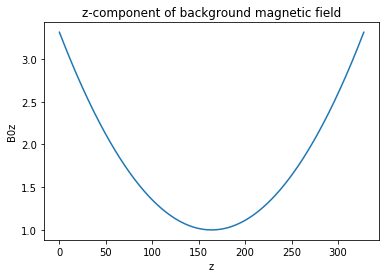

In [17]:
plt.plot(zj,B_background_z(zj))
plt.title('z-component of background magnetic field')
plt.xlabel('z')
plt.ylabel('B0z')

Text(0,0.5,'weights')

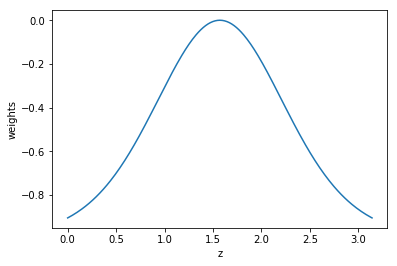

In [3]:
def xiB(z):
    return 1 - 1/(1 + xi*(z - Lz/2)**2)

def xiz(z):
    return 1 + (wperp**2/wpar**2 - 1)*xiB(z)

plt.plot(zj,np.exp(-1.5*(xiz(zj) - 1)) - 1)
plt.xlabel('z')
plt.ylabel('weights')

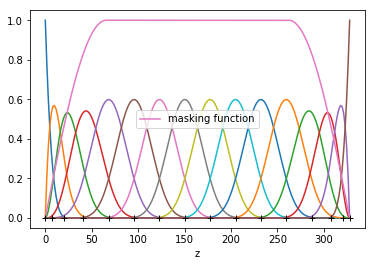

In [69]:
nel = 12
nz = 200
Ld = 0.2*Lz
p = 4
bcs = 2
nodes = np.linspace(0,Lz,nel + 1)

bsp,N,quad_points,weights = createBasis(Lz,nel,p,bcs)
M,C,D,M_damp,C_damp,D_damp,M_dz_damp = matrixAssembly(bsp,p,nel,weights,quad_points,B_background_z,bcs,damp,dz_damp)

y = np.zeros((N,nz),dtype = np.double)
zplot = np.linspace(0,Lz,nz)
for i in range(0,N):
    y[i] = bsp(zplot,i)
    plt.plot(zplot,bsp(zplot,i))
    
da = np.zeros(nz)
for i in range(0,nz):
    da[i] = damp(zplot[i])
 

 
Tbsp = np.array([0]*p + list(nodes) + [Lz]*p)

xi_i = np.zeros(N)
for i in range(N):
    for j in range(i+1,i+p+1):
        xi_i[i] += 1/p*Tbsp[j]
        
Bsp = np.zeros((N,N))
Bsp2 = np.zeros((N,N))


for i in range(N):
    for j in range(N):
        Bsp[i,j] = bsp(xi_i[i],j)


p_boundary_l = p
p_boundary_r = p + 3
counter = 2

# left boundary
for ie in range(p+1):
    
    for il in range(p_boundary_l):
        Bsp2[il,ie] = bsp(xi_i[il],ie)
    p_boundary_l +=1
    
# bulk
for ie in range(p+1,N-p-1):
    
    for il in range(p+2):
        i = il + counter
        Bsp2[i,ie] = bsp(xi_i[i],ie)
    counter += 1
    
    

# right boundary
for ie in range(N-p-1,N):
    
    for il in range(p_boundary_r):
        i = N - p_boundary_r + il
        Bsp2[i,ie] = bsp(xi_i[i],ie)
    p_boundary_r -=1 


plt.plot(zplot,da,label = 'masking function')
plt.plot(bsp.greville(),np.zeros(N),'k+')
plt.xlabel('z')
plt.legend()

Text(0,0.5,'v_par')

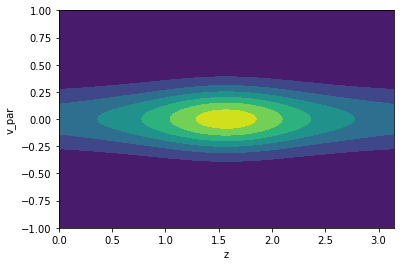

In [31]:
Z,V = np.meshgrid(zj,vj)
F0 = fh0(Z,0.25,0.25,V)
plt.contourf(Z,V,F0)
plt.xlabel('z')
plt.ylabel('v_par')